# Introducción

Los nodos se comunican entre ellos utilizando diferentes canales, el más sencillo se denomina Topic, pero también pueden utilizanse Servicios y Acciones.
Todos estos interfaces utilizan el protocolo de comunicaciones Data Distribution Service - Real Time Publish-Subscribe (DDS-RTPS). Empezaremos comentando algunos aspectos básicos de este protocolo.

# Protocolo Data Distribution Service - Real Time Publish-Subscribe (DDS-RTPS)

DDS es un estandard de comunicaciones utilizado en la industria, fue desarrollado por el Grupo Object  Management basándose en un sistema de intercambio de mensajes Publish-Subscriber. Este estandar funciona sobre redes de comunicaciones complejas, permitiendo que el usuario aproveche todas las ventajas que ofrece la red de una manera rápida y sencilla.
Existen varios fabricantes que han desarrollado software utilizando este estandar: RTI, ADLINK Technologies, Twin Oaks Software y eProxima. 

La siguiente figura muestra un modelo simplificado del esquema de comunicaciones que utiliza el protocolo DDS-RTPS. Se observa que hay tres nodos, los cuales incluyen elementos Publisher, Subscriber o ambos. Los Publisher permitirán escribir en los Topics, mientras que los Subscriber permiten leer de los Topics.
Cada Topic admite un mensaje que posee una forma fija. Antes de comenzar a tabajar con un Topic deberemos conocer el tipo de mensaje que admite.

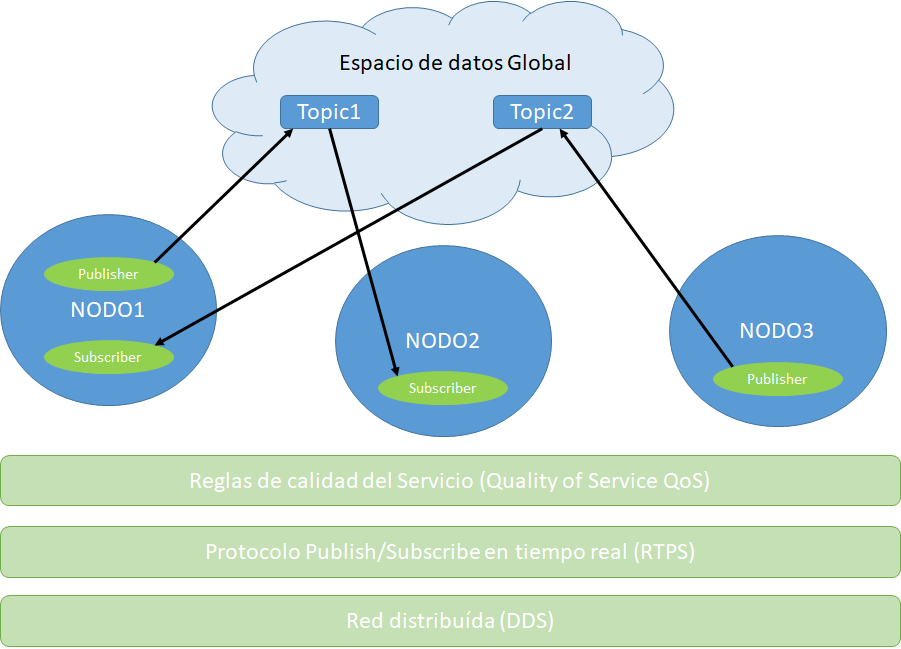

Por debajo de nuestros Nodos se encuentran varias capas que permiten la comunicación y nos proporcionan algunas características útiles para asegurar la fiabilidad de la comunicación. Vamos a revisar cada una de ellas.




# Protocolo Publish/Subscriber en Tiempo Real (RTPS)

Utiliza el protocolo UDP (User datagram Protocol). En este protocolo los mensajes se envían sin esperar una confirmación de la recpeción, de ese modo se consigue elevada velocidad pero baja fiabilidad. 

Por este motivo se le añade una segunda capa, denominada Servicio de Calidad (QoS). Con esta segunda capa se introducen reglas que nos permitirán ajustar la fiabilidad de la comunicación.

# Servicio de Calidad (QoS)

ROS2 ofrece una variedad de modos de comunicación, que llamaremos políticas QoS, que nos va a permitir elegir diferentes modos de comunicar nodos a través de los Topics. Estas políticas hacen que la comunicación sea configurable, eligiendo en cada momento las opciones que más nos interesen. 
En cada Publisher/Subscriber se podrán pogramar estas políticas para garantizar la calidad de las transmisiones realizadas. Vamos a ver cada una de estas propiedades:


1- Fiabilidad (Reliability): indica el nivel de garantía que ofrece el protocolo en relación a que un mensaje transmitido será recibido correctamente. Las posibildades que ofrece son:
  - RELIABLE: se espera que el receptor emita una confirmación de que ha recibido el mensaje correctamente. Este modo de funcionamiento es más lento pero más seguro.
  - BEST_EFFORD: no se espera confirmación de la recepción.

2- Historia (History): se refiere a si se almacenan o no los mensajes recibidos. Ofrece las siguientes posibilidades de configuración:
- KEEP_ALL: se almancenan todos los mensajes
- KEEP_LAST: sólo se almacenan los últimos, en este caso se debe definir la cola de mensajes que deben almacenarse.

3- Durabilidad (Durability): define cómo se comporta un topic en relación con los mensajes que existían antes de que se una el subscriptor. Los modos de funcionamiento son:
- VOLATILE: los mensajes del pasado se ignoran
- TRANSIENT_LOCAL: cuando se une un nuevo subscriptor su cola se rellena con los mensajes anteriores que fueron almacenados localmente


4- Deadline: máxima cantidad de tiempo entre mensajes a publicar. Pasado ese tiempo emitirá un error.

5- Lifespan: máxima cantidad de tiempo que se permite entre la publicación y la rececepción de un mensaje. Si se supera ese tiempo se considerará que el mensaje ha expirado.

6- Liveliness: se refiere a qué nodos permanecen activos.
- AUTOMATION: cuando cualquier nodo publica un mensaje, el sistema considera que todos los nodos están activos (o vivos).
- MANUAL BY TOPIC: hay que decirle al sistema qué nodos permanecerán vivos (haciendo una llamada al Topic)

7- Lease Duration: es la cantidad de tiempo que permanece vivo un nodo que contiene un Publisher después de la última publicación. Pasado este tiempo el sistema considera que se ha producido un fallo.

Es necesario asegurar la compatibilidad entre Publishers y Subscribers, por lo que sólo se establecerán aquellas conexiones en las que la política QoS del publisher sea compatible con la del Subscriber. 

Podéis consultar las tablas de compatibilidad a través del siguiente [enlace](https://docs.ros.org/en/rolling/Concepts/About-Quality-of-Service-Settings.html).

Algunas de las políticas QoS permiten la generación de eventos. Deberá ser el desarrollador del programa el que codifique qué función se ejecutará cuando se produce un determinado evento.
Podemos dividir los enventos en dos tipos:


*   Eventos asociados a Publishers: 
  - Offered deadline missing: se ha superado el tiempo establecido como deadline
   -Liveliness missing: el nodo ha muerto
  - Offered incompatible QoS: incompatibilidad en las políticas QoS
*   Eventos asociados a Subscribers:
     - Requested deadline missing: no se ha 
recibido mensaje alguno y se ha superado el tiempo de espera establecido
     - Liveliness changed: el subscriptor se da cuenta de que alguno de los publishers ha muerto
     - Request incompatible QoS: incompatibilidad en las políticas QoS



# Red Distribuida

El protocolo DDS permite tener varios nodos ejecutándose sobre la misma red. 
El espacio de datos global se denomina Dominio ROS, y se establece a tavés de una variable de entorno llamada ROS_DOMAIN_ID que fijaremos al lanzar un determinado nodo. De esta manera le estamos comunicando a la red que ese nodo está ejecutándose sobre un dominio determinado.


Los nodos que están ejecutándose bajo el mismo dominio pueden descubrirse unos a otros, incluso aunque se encuentren ejecutándose en distintos ordenadores (siempre que estén en la misma red, y que ésta tenga habilitada la posibilidad de transmisión UDP multicast).


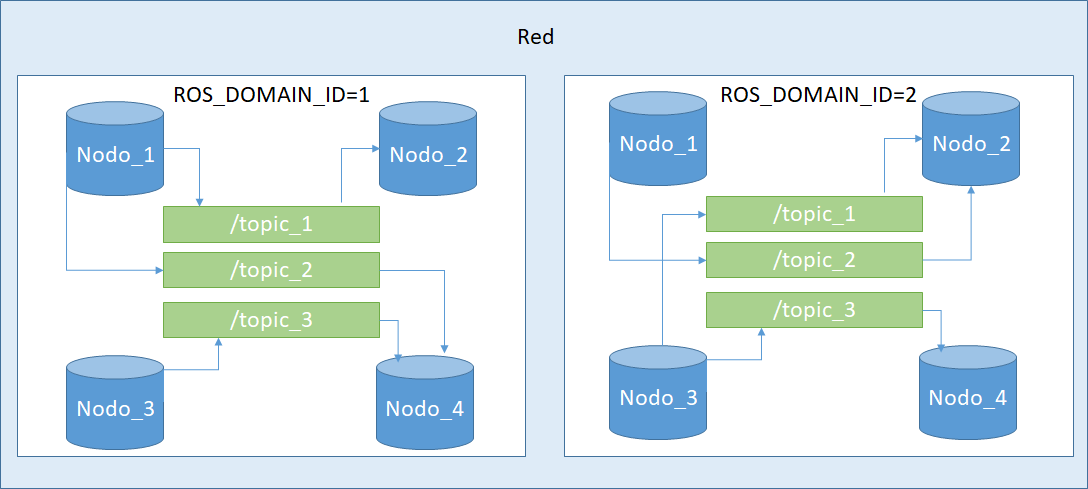

Para comprobar si tenéis activada la opción de tranmisión MULTICAST sólo tenéis que ejecutar el comeando "ifconfig" en vuestra máquina virtual, y comprobar la dirección IP y aseguraros de que aparece la opción  MULTICAST, como se muestra en la siguiente pantalla.

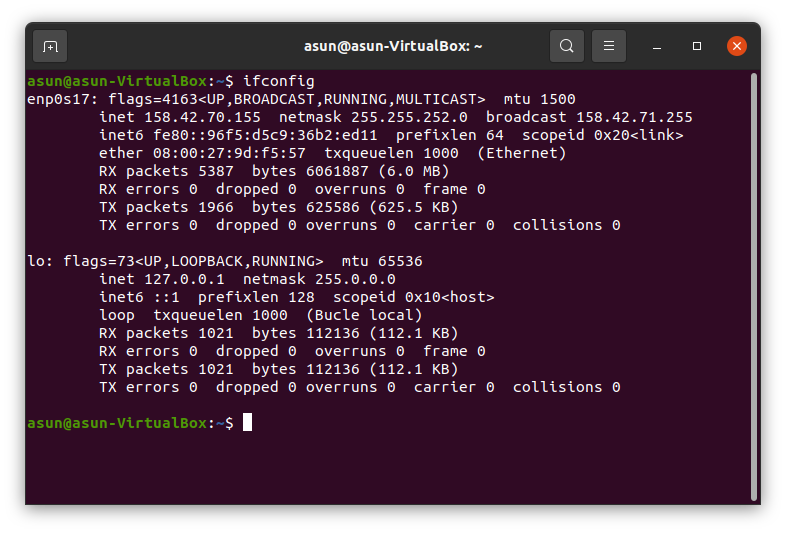

Las redes distribuídas permiten que varias aplicaciones estén transmitiendo y recibiendo datos a la vez, de manera autónoma y asíncrona.